In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
data.shape

(14640, 15)

In [7]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
data["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [9]:
data["text"].str.lower().head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: text, dtype: object

In [10]:
data["airline"].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

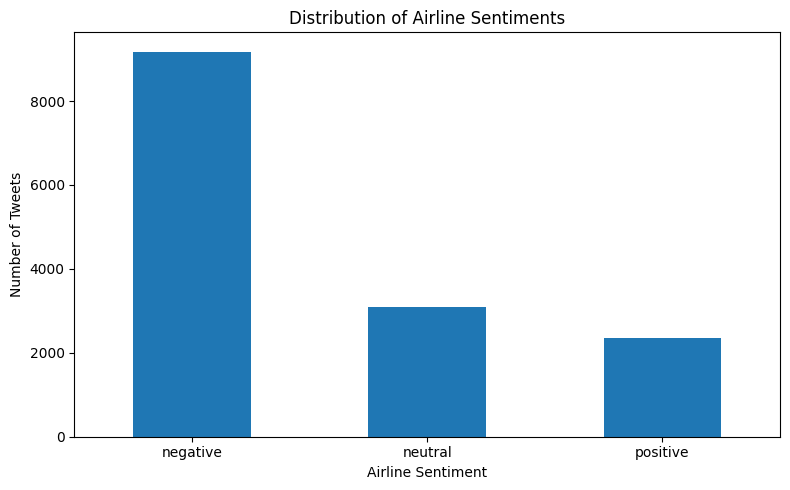

Distribution of Airline Sentiments chart is saved as src/airline_sentiment_distribution_bar_chart.png


In [11]:
# calculating value counts for "airline_sentiment"
sentiment_counts = data['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar')
plt.xlabel('Airline Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Airline Sentiments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('src/airline_sentiment_distribution_bar_chart.png')
plt.show()
print("Distribution of Airline Sentiments chart is saved as src/airline_sentiment_distribution_bar_chart.png")


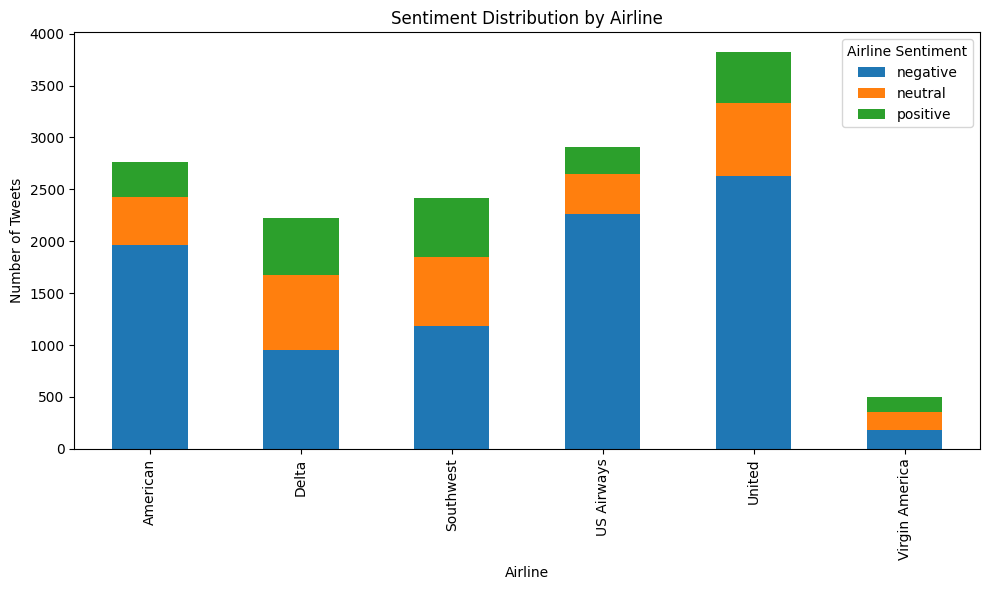

Sentiment Distribution by Airline chart is saved as src/sentiment_distribution_by_airline_stacked_bar_chart_matplotlib.png


In [12]:
# grouping the DataFrame by "airline" and calculating value counts for "airline_sentiment"
sentiment_by_airline = data.groupby('airline')['airline_sentiment'].value_counts().unstack(fill_value=0).reset_index()
sentiment_by_airline = sentiment_by_airline.melt(id_vars='airline', var_name='airline_sentiment', value_name='count')

pivot_df = sentiment_by_airline.pivot(index='airline', columns='airline_sentiment', values='count')

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution by Airline')
plt.legend(title='Airline Sentiment')
plt.tight_layout()
plt.savefig('src/sentiment_distribution_by_airline_stacked_bar_chart_matplotlib.png')
plt.show()
print("Sentiment Distribution by Airline chart is saved as src/sentiment_distribution_by_airline_stacked_bar_chart_matplotlib.png")

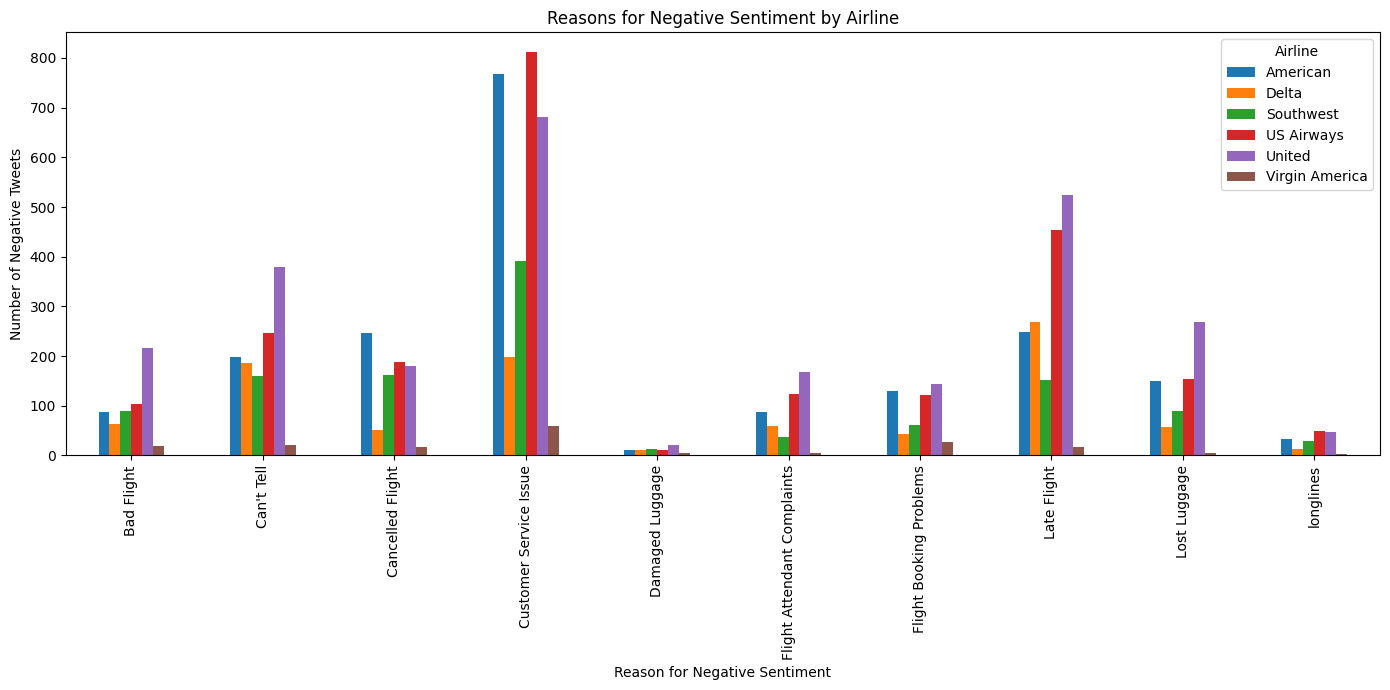

Reasons for Negative Sentiment by Airline chart is saved as src/negative_sentiment_reasons_by_airline_grouped_bar_chart_matplotlib.png


In [13]:
# filtering the DataFrame to include only rows where "airline_sentiment" is 'negative'
negative_tweets = data[data['airline_sentiment'] == 'negative']

# grouping the filtered DataFrame by both "airline" and "negativereason" and calculate value counts
reason_by_airline = negative_tweets.groupby(['airline', 'negativereason']).size().reset_index(name='count')

pivot_reason = reason_by_airline.pivot(index='negativereason', columns='airline', values='count')

pivot_reason.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Reason for Negative Sentiment')
plt.ylabel('Number of Negative Tweets')
plt.title('Reasons for Negative Sentiment by Airline')
plt.legend(title='Airline')
plt.tight_layout()
plt.savefig('src/negative_sentiment_reasons_by_airline_grouped_bar_chart_matplotlib.png')
plt.show()
print("Reasons for Negative Sentiment by Airline chart is saved as src/negative_sentiment_reasons_by_airline_grouped_bar_chart_matplotlib.png")

In [14]:
# ensuring that the "text" and "airline_sentiment" columns has unique datatypes
num_text_types = data['text'].apply(type).nunique()
num_sentiment_types = data['airline_sentiment'].apply(type).nunique()
print(f"Number of datatypes in 'text': {num_text_types}")
print(f"Number of datatypes in 'airline_sentiment': {num_sentiment_types}")

Number of datatypes in 'text': 1
Number of datatypes in 'airline_sentiment': 1
